In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as sns
from IPython.display import display, HTML

from AssignmentThreeFunctions import get_data, init_trait_data

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

%matplotlib inline

# Part 1: Narrow Sense Heritability

**Question 1**: Estimate narrow-sense heritability for the four traits. [DONE]

**Question 2**: Discuss the relevance of genes vs environment in affecting the studied traits. *In a few sentences.*

In [2]:
raw_data = get_data()
display(raw_data.head(1))

# Trait 1
trait_1 = init_trait_data(trait='t1')
display(trait_1.head(1))

# Trait 2
trait_2 = init_trait_data(trait='t2')
display(trait_2.head(1))

# Trait 3
trait_3 = init_trait_data(trait='t3')
display(trait_3.head(1))

# Trait 4
trait_4 = init_trait_data(trait='t4')
display(trait_4.head(1))

,ID,p1_t1,p2_t1,o_t1,p1_t2,p2_t2,o_t2,p1_t3,p2_t3,o_t3,p1_t4,p2_t4,o_t4
0,901,199.288566,198.36864,201.724069,1.444091,1.41216,1.638521,3.015583,2.780835,2.834949,2.684854,2.828727,2.599553


,parent1,parent2,offspring,parent_mid
0,199.288566,198.36864,201.724069,198.828603


,parent1,parent2,offspring,parent_mid
0,1.444091,1.41216,1.638521,1.428126


,parent1,parent2,offspring,parent_mid
0,3.015583,2.780835,2.834949,2.898209


,parent1,parent2,offspring,parent_mid
0,2.684854,2.828727,2.599553,2.756791


Rsq    : 0.36477737006765854
Adj Rsq: 0.3420908475700748


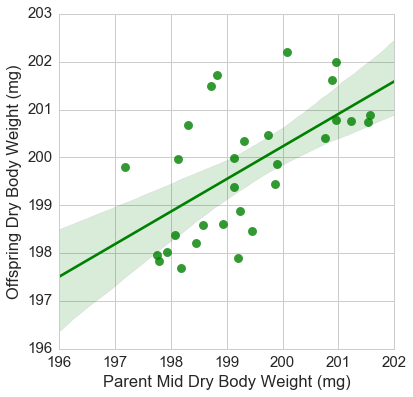

Rsq    : 0.10778403297877803
Adj Rsq: 0.0759191770137343


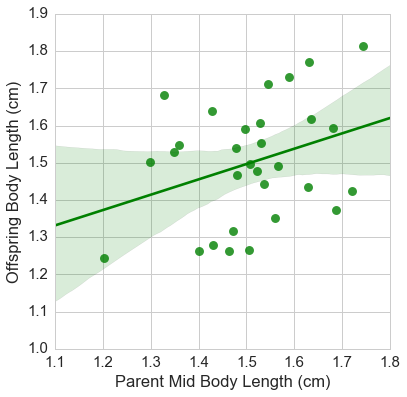

Rsq    : 0.21902450015323527
Adj Rsq: 0.19113251801585074


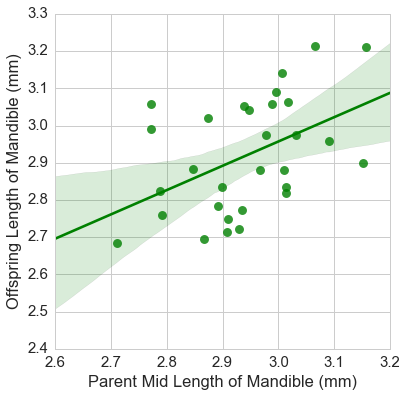

Rsq    : 0.004901231862352584
Adj Rsq: -0.03063800985684928


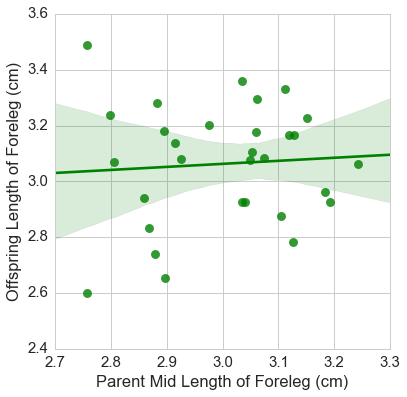

In [3]:
# Parent Offspring Regressions (OLS Regression)
from scipy.stats import linregress
from pandas.stats.api import ols

traits = [trait_1, trait_2, trait_3, trait_4]
names = ['Dry Body Weight (mg)', 'Body Length (cm)', 'Length of Mandible (mm)', 'Length of Foreleg (cm)']

for i, trait in enumerate(traits):
    display(HTML('<hr><h1>Trait {}: {}</h1>'.format(i + 1, names[i])))
    
    # Compute heritability
    results = ols(x=trait['parent_mid'], y=trait['offspring'])
    
    # Quick Stats
    output = 'Heritability: {} p: {}'.format(round(results.beta['x'], 4), round(results.p_value['x'], 4))
    if results.p_value['x'] <= 0.05:
        display(HTML('<strong><h4>SIGNIFICANT<br/>*{}</h4></strong>'.format(output)))
    else:
        display(HTML('<h4>{}</h4>'.format(output)))
        
    print('Rsq    : {}'.format(results.r2))
    print('Adj Rsq: {}'.format(results.r2_adj))
            
    # Graph Regression to the mean
    graph.figure(figsize=(6, 6))
    sns.regplot(x=trait['parent_mid'], y=trait['offspring'], color='g', scatter_kws={'s': 80})
    graph.xlabel('Parent Mid {}'.format(names[i]))
    graph.ylabel('Offspring {}'.format(names[i]))
    graph.show()
    
    # Output Comprehensive Results
    # print(results)

# Part 2: QTL Analysis

**Question 3**: Naive QTL analysis to determine how many QTLs affect the trait and where they are on the genetic map. *No regression graphs!*

**Question 4**: Discuss the relative effects of the identified QTL alleles on horn size? Do QTL allele effect sizes reflect differences between the Short Horn and Long Horn inbred lines?